### 0. Import libraries and load data

In [127]:
import os
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set()

TRAIN_VALIDATION_RESULTS_PATH = "../data/predictions/train_validation/"
TEST_VALIDATION_PATH = "../data/predictions/test/"
STORAGE_PATH = "../results/model_metrics.png"
COLUMN_NAMES = ["pid", "num_followers", "prediction", "baseline_prediction"]

In [128]:
train_validation_results = pd.read_csv(
    TRAIN_VALIDATION_RESULTS_PATH + os.listdir(TRAIN_VALIDATION_RESULTS_PATH)[0],
    header=None,
    names=COLUMN_NAMES,
).sort_values("num_followers")

test_results = pd.read_csv(
    TEST_VALIDATION_PATH + os.listdir(TEST_VALIDATION_PATH)[0],
    header=None,
    names=COLUMN_NAMES,
).sort_values("num_followers")


### 1. Plot predictions vs ground truth

<Axes: >

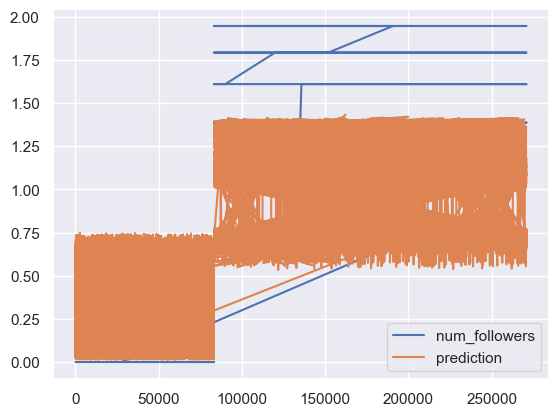

In [129]:
train_validation_results[["num_followers", "prediction"]].plot()

### 1. Plot distribution of the ground truth

<Axes: xlabel='num_followers', ylabel='Count'>

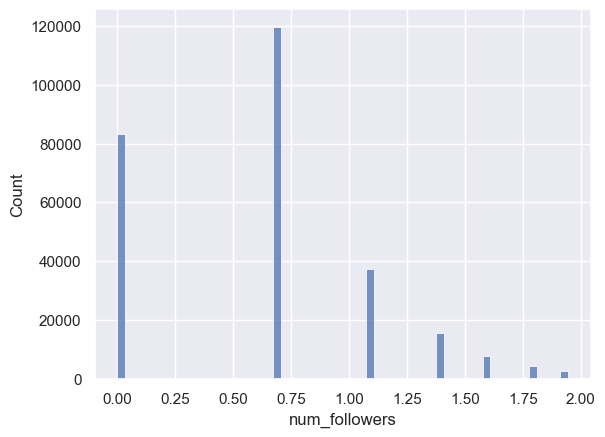

In [130]:
sns.histplot(train_validation_results["num_followers"])

### 2. Plot model performance

In [137]:
labels = [
    "original data",
    "all techniques",
    "outliers removed",
    "deskewed target",
    "undersampled data",
    "outliers removed +\ndeskewed target"
]

# all of the baseline results are close to 0 in terms of R^2
train_baseline_results = [
    -6.783462680459706e-13,
    9.695577674051492e-13,
    -1.8174350913113813e-12,
    9.28590537796481e-13,
    -2.5170121700224257e-06,
    -1.472456558904156e-07
]
test_baseline_results = [
    -3.5060616574433823e-06,
    -9.934883481710344e-05,
    -3.6686334059510273e-07,
    -1.5827559876058217e-06,
    -5.8885087511617584e-05,
    -1.472456558904156e-07
]

train_model_results = [
    0.07615037490248155,
    0.05934966981601597,
    0.01911010135175306,
    0.04091780282111834,
    0.0923725055167921,
    0.04469720637237007
]
test_model_results = [
    -0.006442343229309477,
    0.0580762783905826,
    0.018405495740191347,
    0.03699281820294731,
    -0.01224562480409852,
    0.043613671158115874
]


In [138]:
test_results = pd.DataFrame(
    {"train-validation": train_model_results, "test": test_model_results}
).melt()
test_results["labels"] = labels * 2
test_results.rename(
    {
        "variable": "dataset",
        "value": "Coefficient of determination",
        "labels": "experiment type",
    },
    axis=1,
    inplace=True,
)


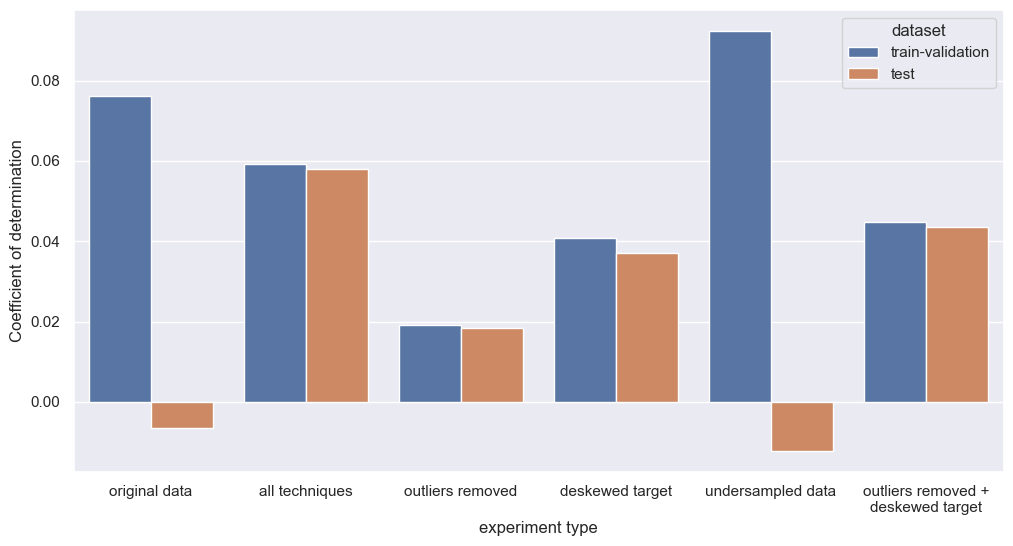

In [141]:
fig, _ = plt.subplots(1, 1)
fig.set_size_inches(12, 6)
sns.barplot(
    data=test_results,
    x="experiment type",
    y="Coefficient of determination",
    hue="dataset",
)
plt.savefig(STORAGE_PATH, dpi=300)
